<a href="https://colab.research.google.com/github/andydaehn/Credit_Risk/blob/main/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Analysis

This analysis will help predict the best drug to use for a particular patient, based on medical data from 200 patients, by classifying the patient to the drug profile.

## Import Libraries and Data

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Ensure visualizations can be viewed by all
vis_color = 'colorblind'
hex_color = '#004c99'

# Load the dataset
feat_df = pd.read_csv('bankloans.csv')

## Exploratory Data Analysis

In [ ]:
# Make it easy to see basic information
def get_basic_info():
    display(feat_df.head())
    display(feat_df.describe())
    display(feat_df.info())
get_basic_info()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,700.000000
mean,35.235652,1.695652,8.781739,8.485217,47.982609,10.063391,1.605111,3.103844,0.261429
std,8.089961,0.927051,6.914762,6.977725,40.508814,6.584288,2.135967,3.529273,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.200000,0.415584,1.047996,0.000000
50%,35.000000,1.000000,7.000000,7.000000,36.000000,8.750000,0.899130,2.038053,0.000000
75%,41.000000,2.000000,13.000000,12.000000,56.750000,13.600000,1.898820,3.864960,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


None

### Analysis of Numerical Features

In [ ]:
# # Drop rows that has NaN values on selected columns
# feat_df=feat_df.dropna(subset=['default'])
# feat_df

In [ ]:
# Combine all numerical features
numerical_cols = feat_df.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

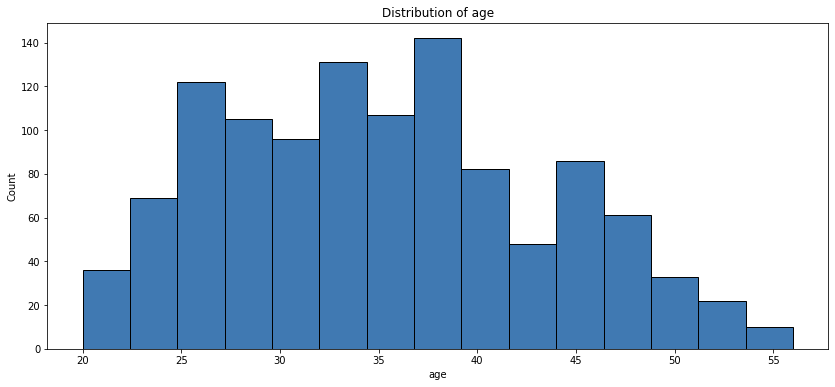

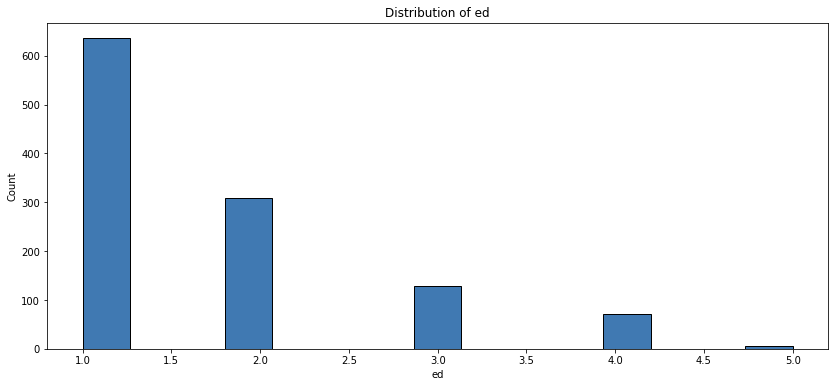

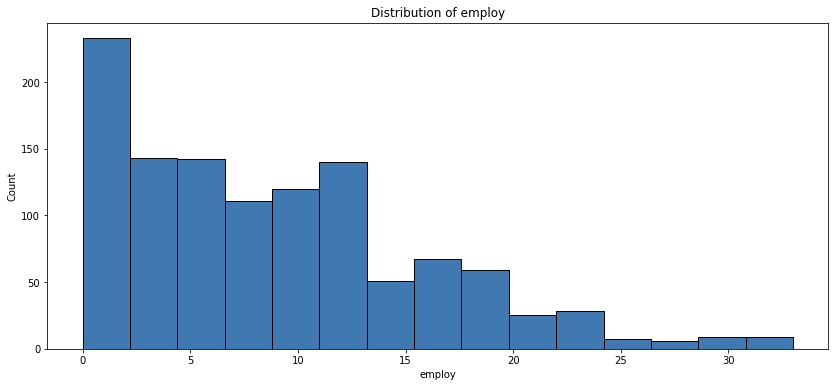

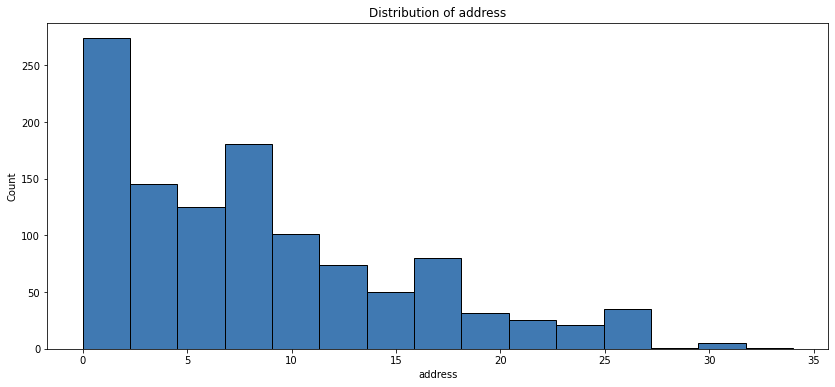

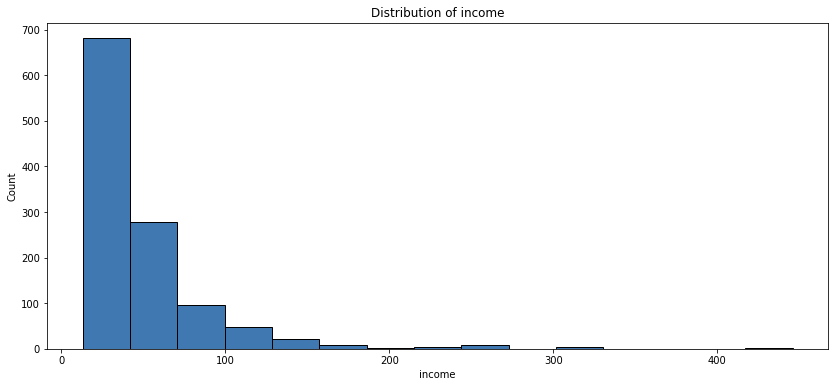

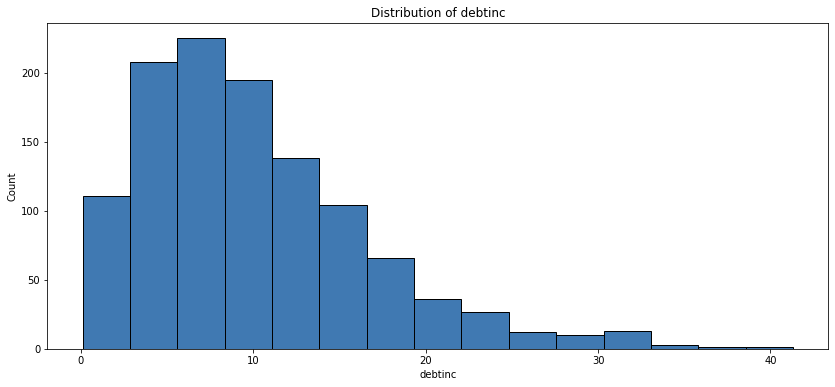

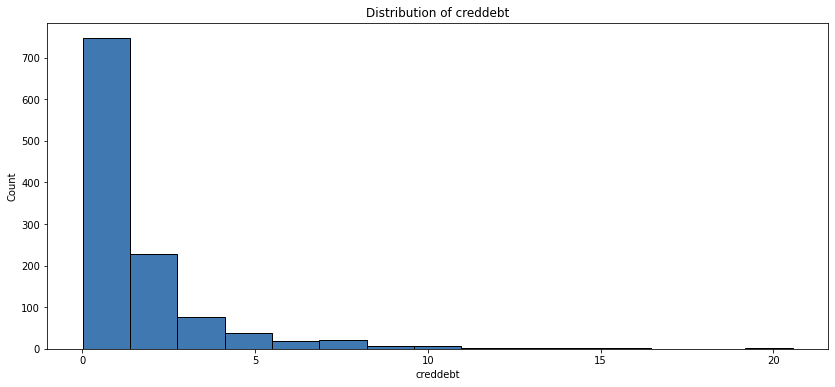

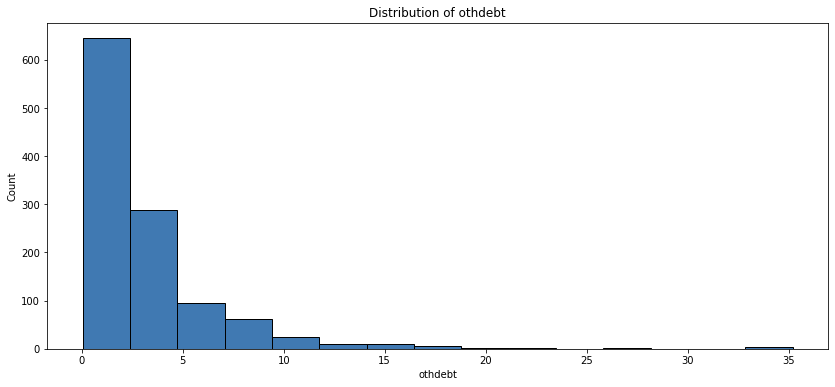

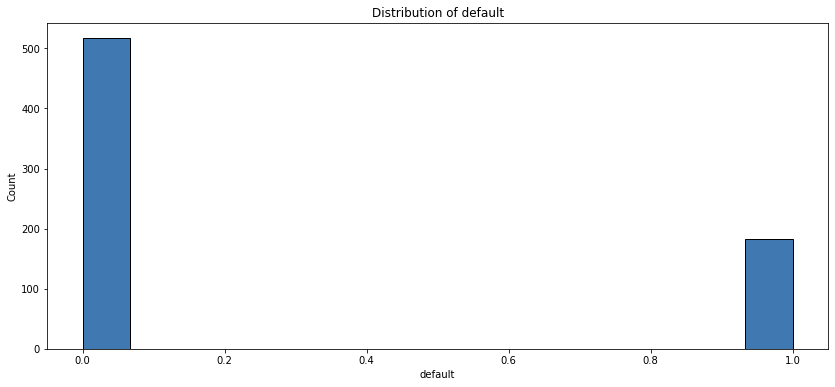

In [ ]:
# Plot numerical column
for col in numerical_cols:
    plt.figure(figsize=(14,6))
    sns.histplot(data=feat_df,x=col,bins=15,color=hex_color)
    plt.title(f"Distribution of {col}")

**Inference:** Na_to_k has a positive skew. Check skewness and kurtosis of Na_to_K

In [ ]:
# # Skewness and kurtosis
# print("Skewness: %f" % feat_df['Na_to_K'].skew())


### Analysis of Categorical Features

In [ ]:
# # Combine all categorical features
# categorical_cols=feat_df.select_dtypes(include=object).columns.to_list()
# categorical_cols

In [ ]:
# # Plot categorical columns
# for col in categorical_cols:
#     plt.figure(figsize=(8,4))
#     sns.countplot(data=feat_df,x=col,palette=vis_color)
#     plt.title(f"Distribution of {col}")

**Inference**: Drug Y is widely used compared to other drugs.

## Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; yo

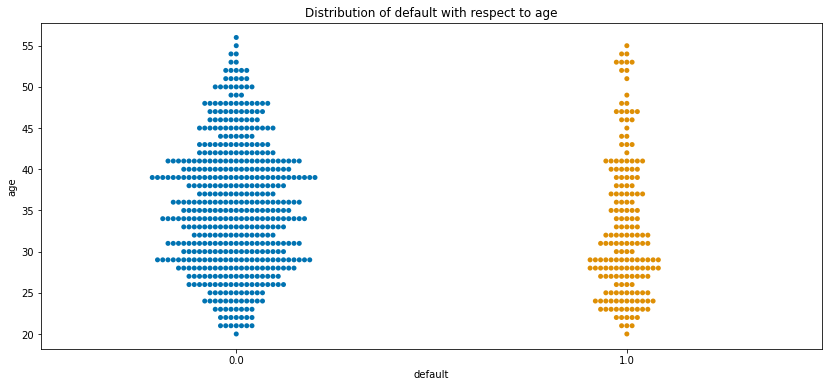

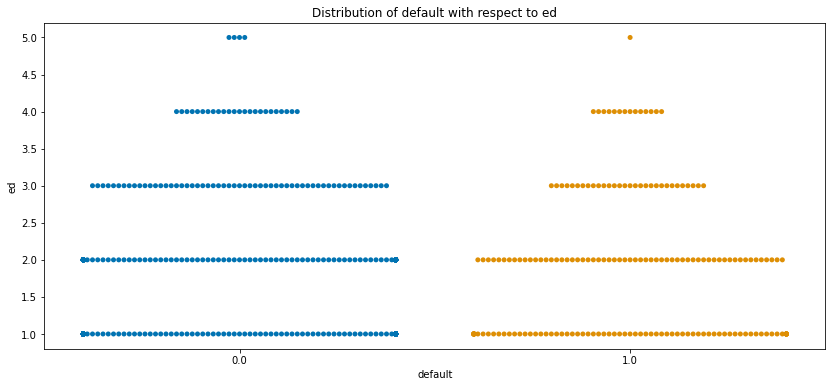

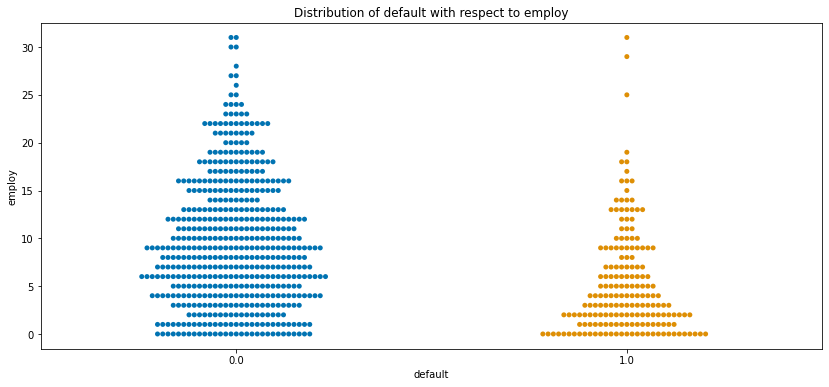

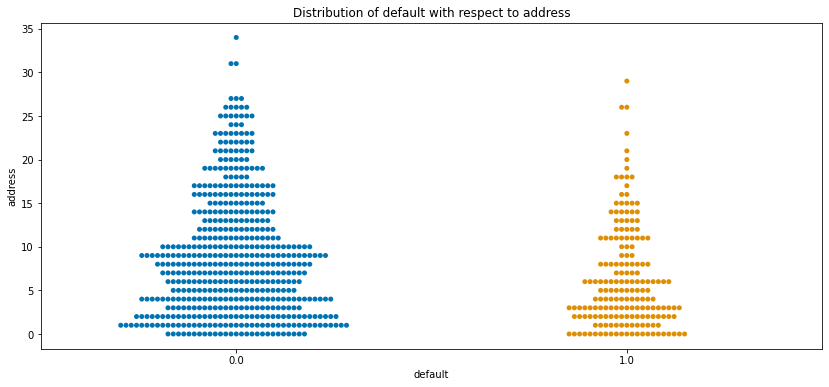

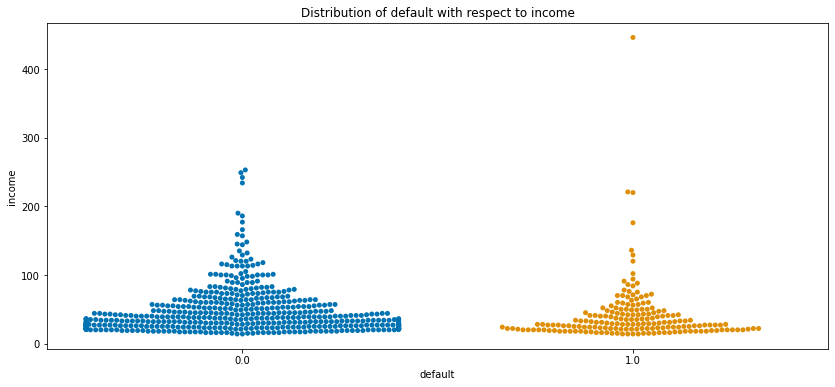

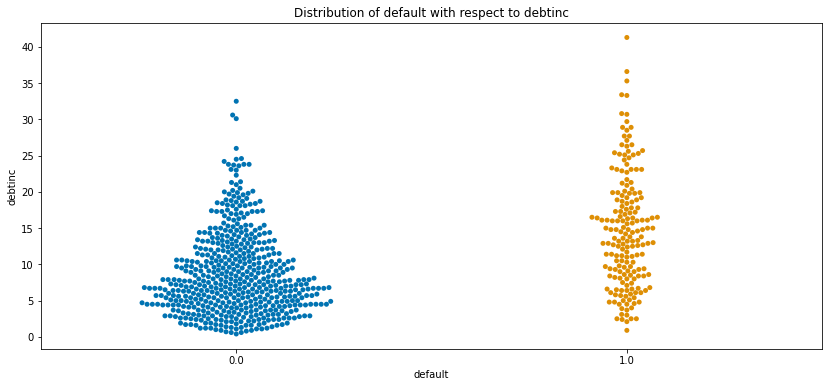

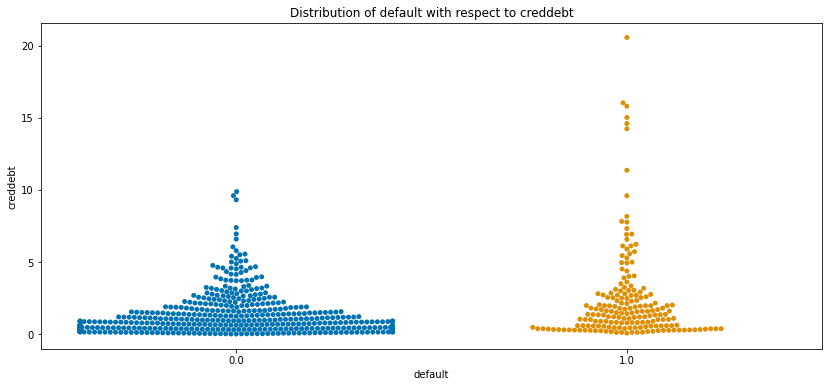

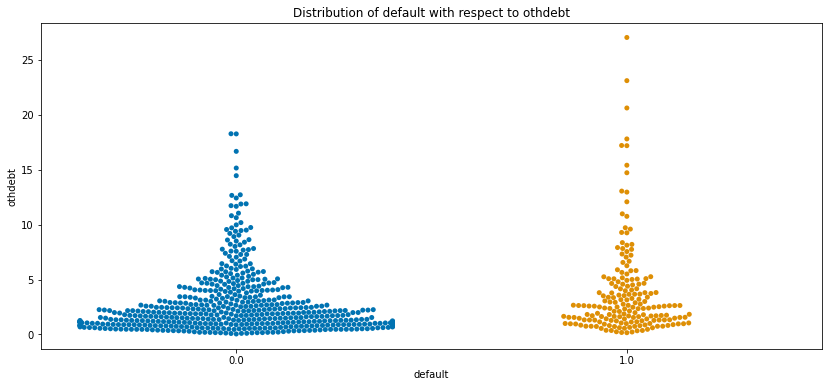

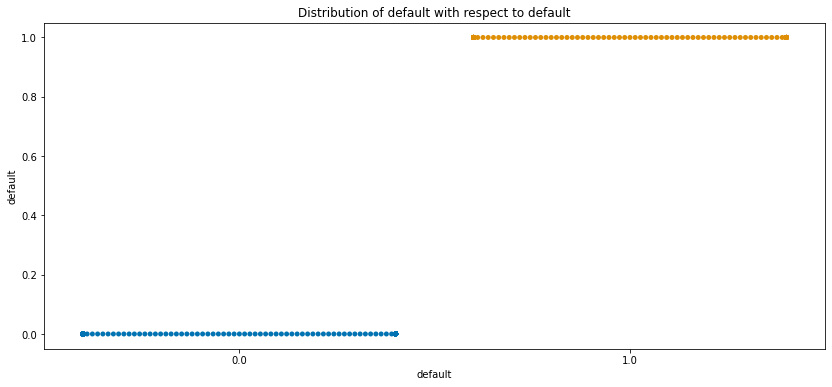

In [ ]:
# Bivariate for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(14,6))
    sns.swarmplot(data=feat_df,x='default',y=col,palette=vis_color)
    plt.title(f"Distribution of default with respect to {col}")

**Inference:** Age may have a correlation with drugA and drugB. Na_to_K appears to have a high correlation to drugY.

In [ ]:
# # Bivariate for categorical columns
# for col in categorical_cols:  
#     plt.figure(figsize=(14,6))
#     sns.countplot(data=feat_df,x='Drug',hue=col,palette=vis_color)
#     plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left',borderaxespad=0)
#     plt.title(f"Drug Distribution with respect to {col}")

**Inference:** Sex appears to have little influence on which drug is used.

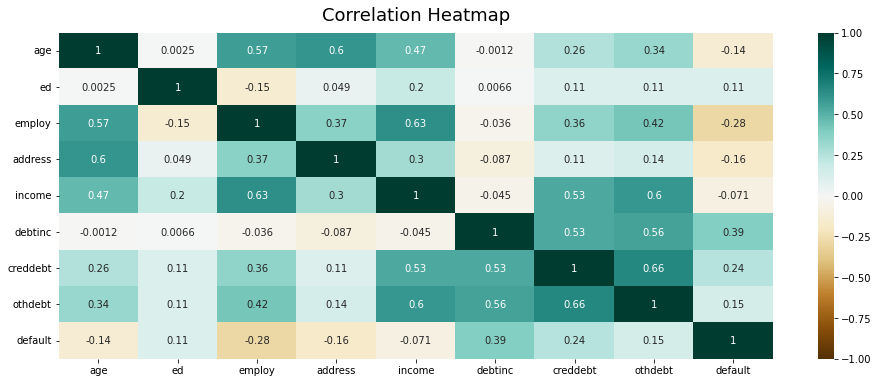

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(feat_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

## Multivariate Analysis

Text(0.5, 1.0, 'Distribution of Drug with respect to Na_to_K and Blood Pressure')

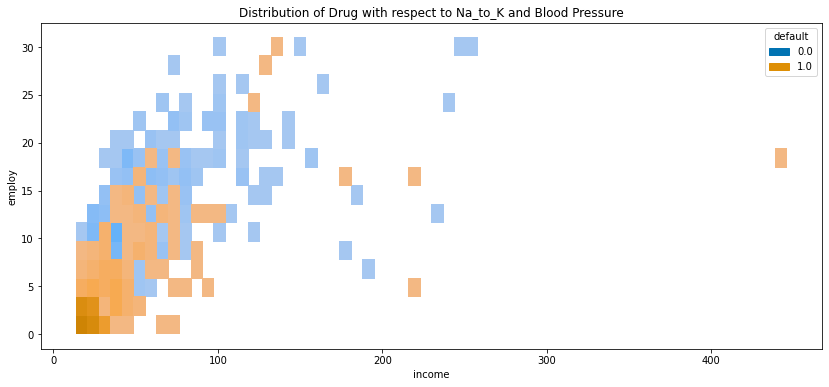

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=feat_df,x='income',y='employ',hue='default',palette=vis_color)
plt.title('Distribution of Drug with respect to Na_to_K and Blood Pressure')

Text(0.5, 1.0, 'Distribution of')

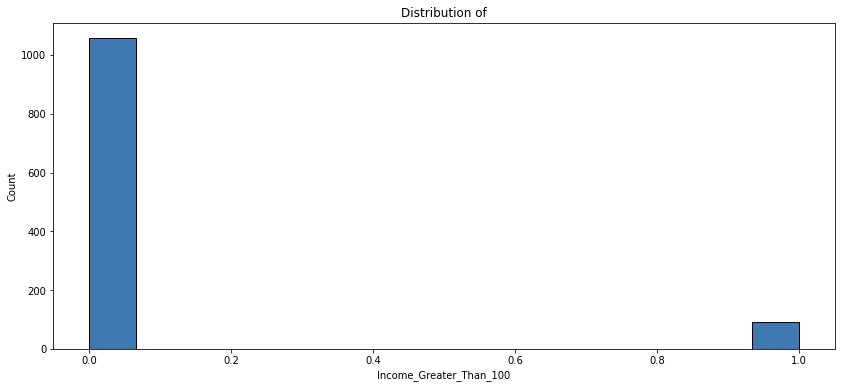

In [ ]:
# Make a new column with Na_to_K greater than 15.0
feat_df['Income_Greater_Than_100'] = [1 if i >=100 else 0 for i in feat_df.income]
plt.figure(figsize=(14,6))
sns.histplot(data=feat_df,x='Income_Greater_Than_100',bins=15,color=hex_color)
plt.title(f"Distribution of")

In [ ]:
# Make a new column with Na_to_K greater than 15.0
feat_df['Employ_Greater_Than_15'] = [1 if i >=100 else 0 for i in feat_df.employ]

In [ ]:
feat_df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Income_Greater_Than_100,Employ_Greater_Than_15
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,1,0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,0,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,0,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,1,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN,0,0
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN,1,0
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN,0,0
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN,0,0


## Data Wrangling


In [ ]:
feat_df['default'].isna

<bound method Series.isna of 0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1145    NaN
1146    NaN
1147    NaN
1148    NaN
1149    NaN
Name: default, Length: 1150, dtype: float64>

### Apply log1p to manage the outliers in Na_to_k

In [ ]:
# print('The original skewness of Na_to_K')
# print("Skewness: %f" % feat_df['Na_to_K'].skew())

# print('\n')

# # Use log1p to adjust the skewness
# feat_df['Na_to_K'] = np.log1p(feat_df['Na_to_K'])

# #Plot new
# plt.figure(figsize=(14,6))
# sns.histplot(data=feat_df,x='Na_to_K',bins=15,color=hex_color)
# plt.title(f"New Distribution of Na_to_K")

# print('The new skewness of Na_to_K')
# print("Skewness: %f" % feat_df['Na_to_K'].skew())


In [ ]:
# # Drop Sex and Cholesterol as they have little influence on the outcome
# feat_df = feat_df.drop(['Sex','Cholesterol'],axis=1)
# feat_df.head()

In [ ]:
# Split data into features and target
y_df = feat_df['default']
X_df = feat_df.drop(['default'],axis=1)
X_df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,Income_Greater_Than_100,Employ_Greater_Than_15
0,41,3,17,12,176,9.3,11.359392,5.008608,1,0
1,27,1,10,6,31,17.3,1.362202,4.000798,0,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0,0
3,41,1,15,14,120,2.9,2.658720,0.821280,1,0
4,24,2,2,0,28,17.3,1.787436,3.056564,0,0
...,...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,0,0
1146,32,2,12,11,116,5.7,4.026708,2.585292,1,0
1147,48,1,13,11,38,10.8,0.722304,3.381696,0,0
1148,35,2,1,11,24,7.8,0.417456,1.454544,0,0


In [ ]:
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# fit on the dataset
new_y_df = np.array(y_df).reshape(-1,1)
imputer.fit(new_y_df)
# transform the dataset
ytrans = imputer.transform(new_y_df)

In [ ]:
ytrans.shape

(1150, 1)

In [ ]:
# # Encode feature variables
# X_df = pd.get_dummies(X_df,['BP'])
# X_df

In [ ]:
# # Encode target variables
# y_df = pd.get_dummies(y_df)
# y_df

## Split, Train, and Test the Data

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_df, ytrans, test_size=0.33, random_state=22)

In [ ]:
# Train the data on the Random Forest Classifier and test the accuracy
rfc = RandomForestClassifier(n_estimators=5,max_depth=5)
rfc.fit(X_train,y_train)

# Making predictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Get Scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Results for Random Forest Classifier')
print('The training accuracy is', (train_accuracy*100),'%')
print('The test accuracy is', (test_accuracy*100),'%')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

In [ ]:
# Plot the import features
feature_importances = pd.DataFrame(rfc.feature_importances_,index=X_df.columns.to_list(),columns=['Importance']).sort_values(by='Importance',ascending=True)
feature_importances.plot(kind='barh',figsize=(14,6));
plt.title("Feature Importance",fontsize=20);

In [ ]:
print(classification_report(y_test,y_test_pred))

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=22)

In [ ]:
# Train the data on the Random Forest Classifier and test the accuracy
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train,y_train)

# Making predictions
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Get Scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Results for Decision Tree Classifier')
print('The training accuracy is', (train_accuracy*100),'%')
print('The test accuracy is', (test_accuracy*100),'%')

In [ ]:
# Plot the import features
feature_importances = pd.DataFrame(dtc.feature_importances_,index=X_df.columns.to_list(),columns=['Importance']).sort_values(by='Importance',ascending=True)
feature_importances.plot(kind='barh',figsize=(14,6));
plt.title("Feature Importance",fontsize=20);

In [ ]:
print(classification_report(y_test,y_test_pred))